In [1]:
#*********************************************
# Levi Sutton
# CS 4412 (Tuesday/Thursday 6:30)
# Class Assignment 2
#
#*********************************************
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plot
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.options.mode.chained_assignment = None
data = pd.read_csv("Live.csv")
df = pd.DataFrame(data) 
df1 = df.iloc[:,[1,3,4,5,6,7,8,9,10,11]]
print(df1)

     status_type  num_reactions  num_comments  num_shares  num_likes  \
0          video            529           512         262        432   
1          photo            150             0           0        150   
2          video            227           236          57        204   
3          photo            111             0           0        111   
4          photo            213             0           0        204   
...          ...            ...           ...         ...        ...   
7045       photo             89             0           0         89   
7046       photo             16             0           0         14   
7047       photo              2             0           0          1   
7048       photo            351            12          22        349   
7049       photo             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
0            92         3          1         1           0  
1            

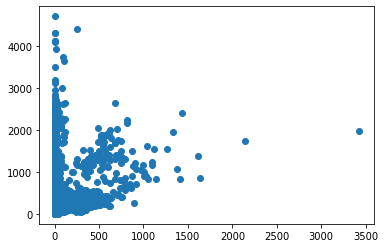

In [3]:
plot.scatter(df1.num_shares, df1.num_reactions)

  status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0       video            529           512         262        432         92   
1       photo            150             0           0        150          0   
2       video            227           236          57        204         21   
3       photo            111             0           0        111          0   
4       photo            213             0           0        204          9   

   num_wows  num_hahas  num_sads  num_angrys  KMeansCluster  
0         3          1         1           0              2  
1         0          0         0           0              0  
2         1          1         0           0              2  
3         0          0         0           0              0  
4         0          0         0           0              2  


Text(0, 0.5, 'Number of Reactions')

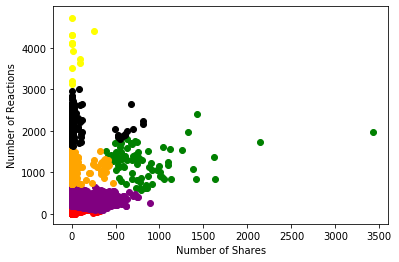

In [4]:
#***********************************************
# K MEANS CLUSTERING (6 clusters)
#***********************************************
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(df1[['num_shares', 'num_reactions']])
df1['KMeansCluster'] = y_predicted
print(df1.head())

df2 = df1[df1.KMeansCluster==0]
df3 = df1[df1.KMeansCluster==1]
df4 = df1[df1.KMeansCluster==2]
df5 = df1[df1.KMeansCluster==3]
df6 = df1[df1.KMeansCluster==4]
df7 = df1[df1.KMeansCluster==5]

plot.scatter(df2.num_shares, df2.num_reactions, color='red')
plot.scatter(df3.num_shares, df3.num_reactions, color='green')
plot.scatter(df4.num_shares, df4.num_reactions, color='purple')
plot.scatter(df5.num_shares, df5.num_reactions, color='orange')
plot.scatter(df6.num_shares, df6.num_reactions, color='black')
plot.scatter(df7.num_shares, df7.num_reactions, color='yellow')

plot.xlabel('Number of Shares')
plot.ylabel('Number of Reactions')

In [5]:
scaler = MinMaxScaler()

scaler.fit(df1[['num_shares']])
df1['num_shares'] = scaler.transform(df1[['num_shares']])

scaler.fit(df1[['num_reactions']])
df1['num_reactions'] = scaler.transform(df1[['num_reactions']])

km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(df1[['num_shares', 'num_reactions']])
df1['KMeansCluster'] = y_predicted
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,KMeansCluster
0,video,0.112314,512,0.076519,432,92,3,1,1,0,5
1,photo,0.031847,0,0.000000,150,0,0,0,0,0,2
2,video,0.048195,236,0.016647,204,21,1,1,0,0,0
3,photo,0.023567,0,0.000000,111,0,0,0,0,0,2
4,photo,0.045223,0,0.000000,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,0.018896,0,0.000000,89,0,0,0,0,0,2
7046,photo,0.003397,0,0.000000,14,1,0,1,0,0,2
7047,photo,0.000425,0,0.000000,1,1,0,0,0,0,2
7048,photo,0.074522,12,0.006425,349,2,0,0,0,0,0


In [6]:
km.cluster_centers_

array([[0.0048923 , 0.07465061],
       [0.00552224, 0.49202197],
       [0.00128356, 0.01005481],
       [0.01292693, 0.24918742],
       [0.23886978, 0.28169665],
       [0.07973858, 0.05266979]])

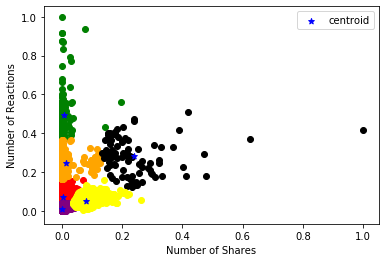

In [7]:
df2 = df1[df1.KMeansCluster==0]
df3 = df1[df1.KMeansCluster==1]
df4 = df1[df1.KMeansCluster==2]
df5 = df1[df1.KMeansCluster==3]
df6 = df1[df1.KMeansCluster==4]
df7 = df1[df1.KMeansCluster==5]

plot.scatter(df2.num_shares, df2.num_reactions, color='red')
plot.scatter(df3.num_shares, df3.num_reactions, color='green')
plot.scatter(df4.num_shares, df4.num_reactions, color='purple')
plot.scatter(df5.num_shares, df5.num_reactions, color='orange')
plot.scatter(df6.num_shares, df6.num_reactions, color='black')
plot.scatter(df7.num_shares, df7.num_reactions, color='yellow')
plot.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='blue', marker='*', label='centroid')

plot.xlabel('Number of Shares')
plot.ylabel('Number of Reactions')
plot.legend()

  status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0       video       0.112314           512    0.076519        432         92   
1       photo       0.031847             0    0.000000        150          0   
2       video       0.048195           236    0.016647        204         21   
3       photo       0.023567             0    0.000000        111          0   
4       photo       0.045223             0    0.000000        204          9   

   num_wows  num_hahas  num_sads  num_angrys  KMeansCluster  \
0         3          1         1           0              5   
1         0          0         0           0              2   
2         1          1         0           0              0   
3         0          0         0           0              2   
4         0          0         0           0              0   

   AggloClusterComplete  
0                     2  
1                     2  
2                     2  
3                     2  
4         

Text(0, 0.5, 'Number of Reactions')

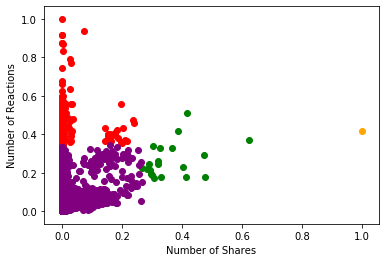

In [8]:
#***********************************************
# Agglomerative Clustering (Linkage: Complete)
#***********************************************

aggloCluster =  AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
y_predicted = aggloCluster.fit_predict(df1[['num_shares', 'num_reactions']])
df1['AggloClusterComplete'] = y_predicted
print(df1.head())

df2 = df1[df1.AggloClusterComplete==0]
df3 = df1[df1.AggloClusterComplete==1]
df4 = df1[df1.AggloClusterComplete==2]
df5 = df1[df1.AggloClusterComplete==3]

plot.scatter(df2.num_shares, df2.num_reactions, color='red')
plot.scatter(df3.num_shares, df3.num_reactions, color='green')
plot.scatter(df4.num_shares, df4.num_reactions, color='purple')
plot.scatter(df5.num_shares, df5.num_reactions, color='orange')

plot.xlabel('Number of Shares')
plot.ylabel('Number of Reactions')

In [9]:
scaler = MinMaxScaler()

scaler.fit(df1[['num_shares']])
df1['num_shares'] = scaler.transform(df1[['num_shares']])

scaler.fit(df1[['num_reactions']])
df1['num_reactions'] = scaler.transform(df1[['num_reactions']])

aggloCluster = AgglomerativeClustering(n_clusters=4)
y_predicted = aggloCluster.fit_predict(df1[['num_shares', 'num_reactions']])
df1['AggloClusterComplete'] = y_predicted
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,KMeansCluster,AggloClusterComplete
0,video,0.112314,512,0.076519,432,92,3,1,1,0,5,0
1,photo,0.031847,0,0.000000,150,0,0,0,0,0,2,0
2,video,0.048195,236,0.016647,204,21,1,1,0,0,0,0
3,photo,0.023567,0,0.000000,111,0,0,0,0,0,2,0
4,photo,0.045223,0,0.000000,204,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,0.018896,0,0.000000,89,0,0,0,0,0,2,0
7046,photo,0.003397,0,0.000000,14,1,0,1,0,0,2,0
7047,photo,0.000425,0,0.000000,1,1,0,0,0,0,2,0
7048,photo,0.074522,12,0.006425,349,2,0,0,0,0,0,0


In [10]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(df1[['num_shares', 'num_reactions']], y_predicted)
print(clf.centroids_)

[[0.00857914 0.0204202 ]
 [0.00320657 0.18421163]
 [0.00385321 0.48025077]
 [0.2059406  0.2684448 ]]


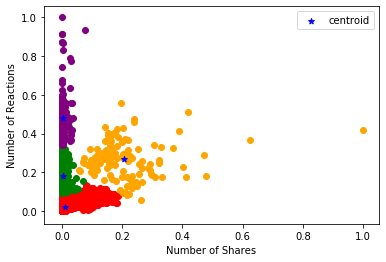

In [11]:
df2 = df1[df1.AggloClusterComplete==0]
df3 = df1[df1.AggloClusterComplete==1]
df4 = df1[df1.AggloClusterComplete==2]
df5 = df1[df1.AggloClusterComplete==3]

plot.scatter(df2.num_shares, df2.num_reactions, color='red')
plot.scatter(df3.num_shares, df3.num_reactions, color='green')
plot.scatter(df4.num_shares, df4.num_reactions, color='purple')
plot.scatter(df5.num_shares, df5.num_reactions, color='orange')
plot.scatter(clf.centroids_[:,0],clf.centroids_[:,1], color='blue', marker='*', label='centroid')

plot.xlabel('Number of Shares')
plot.ylabel('Number of Reactions')
plot.legend()

  status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0       video       0.112314           512    0.076519        432         92   
1       photo       0.031847             0    0.000000        150          0   
2       video       0.048195           236    0.016647        204         21   
3       photo       0.023567             0    0.000000        111          0   
4       photo       0.045223             0    0.000000        204          9   

   num_wows  num_hahas  num_sads  num_angrys  KMeansCluster  \
0         3          1         1           0              5   
1         0          0         0           0              2   
2         1          1         0           0              0   
3         0          0         0           0              2   
4         0          0         0           0              0   

   AggloClusterComplete  AggloClusterAverage  
0                     0                    0  
1                     0                    0  

Text(0, 0.5, 'Number of Reactions')

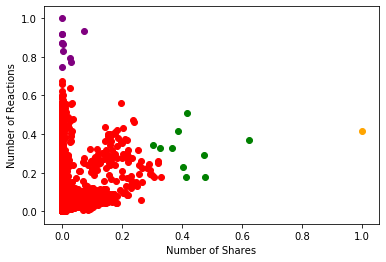

In [12]:
#***********************************************
# Agglomerative Clustering (Linkage: Average)
#***********************************************
aggloCluster2 =  AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
y_predicted = aggloCluster2.fit_predict(df1[['num_shares', 'num_reactions']])
df1['AggloClusterAverage'] = y_predicted
print(df1.head())

df2 = df1[df1.AggloClusterAverage==0]
df3 = df1[df1.AggloClusterAverage==1]
df4 = df1[df1.AggloClusterAverage==2]
df5 = df1[df1.AggloClusterAverage==3]

plot.scatter(df2.num_shares, df2.num_reactions, color='red')
plot.scatter(df3.num_shares, df3.num_reactions, color='green')
plot.scatter(df4.num_shares, df4.num_reactions, color='purple')
plot.scatter(df5.num_shares, df5.num_reactions, color='orange')

plot.xlabel('Number of Shares')
plot.ylabel('Number of Reactions')

In [13]:
scaler = MinMaxScaler()

scaler.fit(df1[['num_shares']])
df1['num_shares'] = scaler.transform(df1[['num_shares']])

scaler.fit(df1[['num_reactions']])
df1['num_reactions'] = scaler.transform(df1[['num_reactions']])

aggloCluster = AgglomerativeClustering(n_clusters=4)
y_predicted = aggloCluster.fit_predict(df1[['num_shares', 'num_reactions']])
df1['AggloClusterAverage'] = y_predicted
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,KMeansCluster,AggloClusterComplete,AggloClusterAverage
0,video,0.112314,512,0.076519,432,92,3,1,1,0,5,0,0
1,photo,0.031847,0,0.000000,150,0,0,0,0,0,2,0,0
2,video,0.048195,236,0.016647,204,21,1,1,0,0,0,0,0
3,photo,0.023567,0,0.000000,111,0,0,0,0,0,2,0,0
4,photo,0.045223,0,0.000000,204,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,0.018896,0,0.000000,89,0,0,0,0,0,2,0,0
7046,photo,0.003397,0,0.000000,14,1,0,1,0,0,2,0,0
7047,photo,0.000425,0,0.000000,1,1,0,0,0,0,2,0,0
7048,photo,0.074522,12,0.006425,349,2,0,0,0,0,0,0,0


In [14]:
clf = NearestCentroid()
clf.fit(df1[['num_shares', 'num_reactions']], y_predicted)
print(clf.centroids_)

[[0.00857914 0.0204202 ]
 [0.00320657 0.18421163]
 [0.00385321 0.48025077]
 [0.2059406  0.2684448 ]]


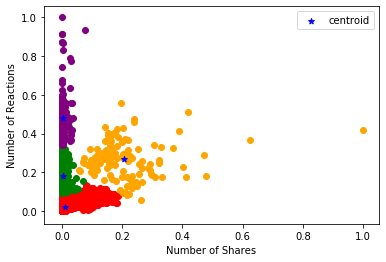

In [15]:
df2 = df1[df1.AggloClusterAverage==0]
df3 = df1[df1.AggloClusterAverage==1]
df4 = df1[df1.AggloClusterAverage==2]
df5 = df1[df1.AggloClusterAverage==3]

plot.scatter(df2.num_shares, df2.num_reactions, color='red')
plot.scatter(df3.num_shares, df3.num_reactions, color='green')
plot.scatter(df4.num_shares, df4.num_reactions, color='purple')
plot.scatter(df5.num_shares, df5.num_reactions, color='orange')
plot.scatter(clf.centroids_[:,0],clf.centroids_[:,1], color='blue', marker='*', label='centroid')

plot.xlabel('Number of Shares')
plot.ylabel('Number of Reactions')
plot.legend()

  status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0       video       0.112314           512    0.076519        432         92   
1       photo       0.031847             0    0.000000        150          0   
2       video       0.048195           236    0.016647        204         21   
3       photo       0.023567             0    0.000000        111          0   
4       photo       0.045223             0    0.000000        204          9   

   num_wows  num_hahas  num_sads  num_angrys  KMeansCluster  \
0         3          1         1           0              5   
1         0          0         0           0              2   
2         1          1         0           0              0   
3         0          0         0           0              2   
4         0          0         0           0              0   

   AggloClusterComplete  AggloClusterAverage  AggloClusterSingle  
0                     0                    0                   0  
1     

Text(0, 0.5, 'Number of Reactions')

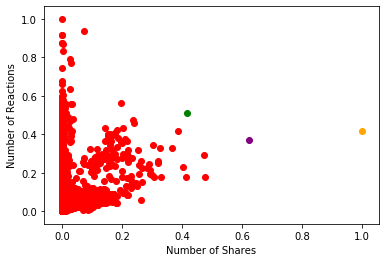

In [16]:
#***********************************************
# Agglomerative Clustering (Linkage Single)
#***********************************************
aggloCluster2 =  AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
y_predicted = aggloCluster2.fit_predict(df1[['num_shares', 'num_reactions']])
df1['AggloClusterSingle'] = y_predicted
print(df1.head())

df2 = df1[df1.AggloClusterSingle==0]
df3 = df1[df1.AggloClusterSingle==1]
df4 = df1[df1.AggloClusterSingle==2]
df5 = df1[df1.AggloClusterSingle==3]

plot.scatter(df2.num_shares, df2.num_reactions, color='red')
plot.scatter(df3.num_shares, df3.num_reactions, color='green')
plot.scatter(df4.num_shares, df4.num_reactions, color='purple')
plot.scatter(df5.num_shares, df5.num_reactions, color='orange')

plot.xlabel('Number of Shares')
plot.ylabel('Number of Reactions')

In [17]:
scaler = MinMaxScaler()

scaler.fit(df1[['num_shares']])
df1['num_shares'] = scaler.transform(df1[['num_shares']])

scaler.fit(df1[['num_reactions']])
df1['num_reactions'] = scaler.transform(df1[['num_reactions']])

aggloCluster = AgglomerativeClustering(n_clusters=4)
y_predicted = aggloCluster.fit_predict(df1[['num_shares', 'num_reactions']])
df1['AggloClusterSingle'] = y_predicted
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,KMeansCluster,AggloClusterComplete,AggloClusterAverage,AggloClusterSingle
0,video,0.112314,512,0.076519,432,92,3,1,1,0,5,0,0,0
1,photo,0.031847,0,0.000000,150,0,0,0,0,0,2,0,0,0
2,video,0.048195,236,0.016647,204,21,1,1,0,0,0,0,0,0
3,photo,0.023567,0,0.000000,111,0,0,0,0,0,2,0,0,0
4,photo,0.045223,0,0.000000,204,9,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,0.018896,0,0.000000,89,0,0,0,0,0,2,0,0,0
7046,photo,0.003397,0,0.000000,14,1,0,1,0,0,2,0,0,0
7047,photo,0.000425,0,0.000000,1,1,0,0,0,0,2,0,0,0
7048,photo,0.074522,12,0.006425,349,2,0,0,0,0,0,0,0,0


In [18]:
clf = NearestCentroid()
clf.fit(df1[['num_shares', 'num_reactions']], y_predicted)
print(clf.centroids_)

[[0.00857914 0.0204202 ]
 [0.00320657 0.18421163]
 [0.00385321 0.48025077]
 [0.2059406  0.2684448 ]]


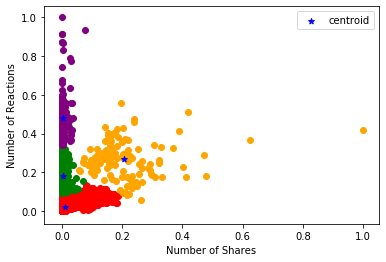

In [19]:
df2 = df1[df1.AggloClusterSingle==0]
df3 = df1[df1.AggloClusterSingle==1]
df4 = df1[df1.AggloClusterSingle==2]
df5 = df1[df1.AggloClusterSingle==3]

plot.scatter(df2.num_shares, df2.num_reactions, color='red')
plot.scatter(df3.num_shares, df3.num_reactions, color='green')
plot.scatter(df4.num_shares, df4.num_reactions, color='purple')
plot.scatter(df5.num_shares, df5.num_reactions, color='orange')
plot.scatter(clf.centroids_[:,0],clf.centroids_[:,1], color='blue', marker='*', label='centroid')

plot.xlabel('Number of Shares')
plot.ylabel('Number of Reactions')
plot.legend()